In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pickle

settings = Settings(name='test')

VDX = ValDXer(settings)
test_name = "BPTI_RW_test"
expt_name = 'BPTI_expt'


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test already exists. Attempting to change name to test0
Experiment name test already exists. Attempting to change name to test1
Experiment name test already exists. Attempting to change name to test2
Experiment name test already exists. Attempting to change name to test3
Experiment name test already exists. Attempting to change name to test4
Experiment name test already exists. Attempting to change name to test5
Experiment name test already exists. Attempting to change name to test6
Experiment name test already exists. Attempting to change name to test7
Experiment name test already exists. Attempting to change name to test8
Experiment name test already exists. Attempting to change name to test9
Experiment name test already exists. Attempting to change name to test10
Experiment name test already exists. Attempting to change name to test11
Experiment name test already exists. Attempting to change name 

In [2]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"



In [3]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [4]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for BPTI_expt
AVG: ncol = 6, len(names) = 4


In [5]:
print(VDX.paths)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

                                                 SEG  calc_name  experimental  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  BPTI_expt         False   
1                                                NaN  BPTI_expt         False   

                                           int_rates  
0                                                NaN  
1  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  


In [6]:
sim_name = 'BPTI_MD'

sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

os.listdir(sim_dir)

md_reps = 1

rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

top_name = "bpti_5pti_eq6_protonly.gro"

top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

traj_name = "bpti_5pti_reimg_protonly.xtc"

traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

print(top_path)
print(traj_paths)


VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   

                                                 SEG  calc_name experimental  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  BPTI_expt        False   
1                                                NaN  BPTI_expt        False   
2                                                NaN    BPTI_MD          NaN   

                                           int_rates  \
0                                           

In [7]:
print((traj_paths))


['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']


In [8]:
VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...     BPTI_expt   
1                                                NaN     BPTI_expt   
2                                                NaN       BPTI_MD   
3                                                NaN  BPTI_RW_test   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                      

In [9]:
# train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [10]:
# VDX.save_experiment()

In [11]:
# dump = train_dfs, val_dfs, train_gammas, val_gammas

# with open('test_dump.pickle', 'wb') as f:
#     pickle.dump(dump, f)

In [12]:
VDX = VDX.load_experiment()

Searching for experiment files in:  logs
Found files:  ['logs/test_full_1700054275.pkl', 'logs/test360_1700052739.pkl']
Loading first experiment.
Loading experiment from:  logs/test_full_1700054275.pkl


['train_BPTI_RW_test_1', 'train_BPTI_RW_test_2', 'train_BPTI_RW_test_3', 'train_BPTI_RW_test_4', 'train_BPTI_RW_test_5']
['val_BPTI_RW_test_1', 'val_BPTI_RW_test_2', 'val_BPTI_RW_test_3', 'val_BPTI_RW_test_4', 'val_BPTI_RW_test_5']
plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0           BPTI_expt
1    0.09039  0.43293  0.99656  1.00000        1           BPTI_expt
2    0.02665  0.14933  0.80157  1.00000        2           BPTI_expt
3    0.18680  0.71010  1.00000  1.00000        3           BPTI_expt
4    0.99880  1.00000  1.00000  1.00000        4           BPTI_expt
..       ...      ...      ...      ...      ...                 ...
241  0.99138  1.00000  1.00000  1.00000        3  val_BPTI_RW_test_5
242  0.00196  0.01167  0.11076  0.75553        4  val_BPTI_RW_test_5
243  0.06230  0.31969  0.97876  1.00000        5  val_BPTI_RW_test_5
244  0.14661  0.61301  0.99992  1.00000        6  val_BPTI

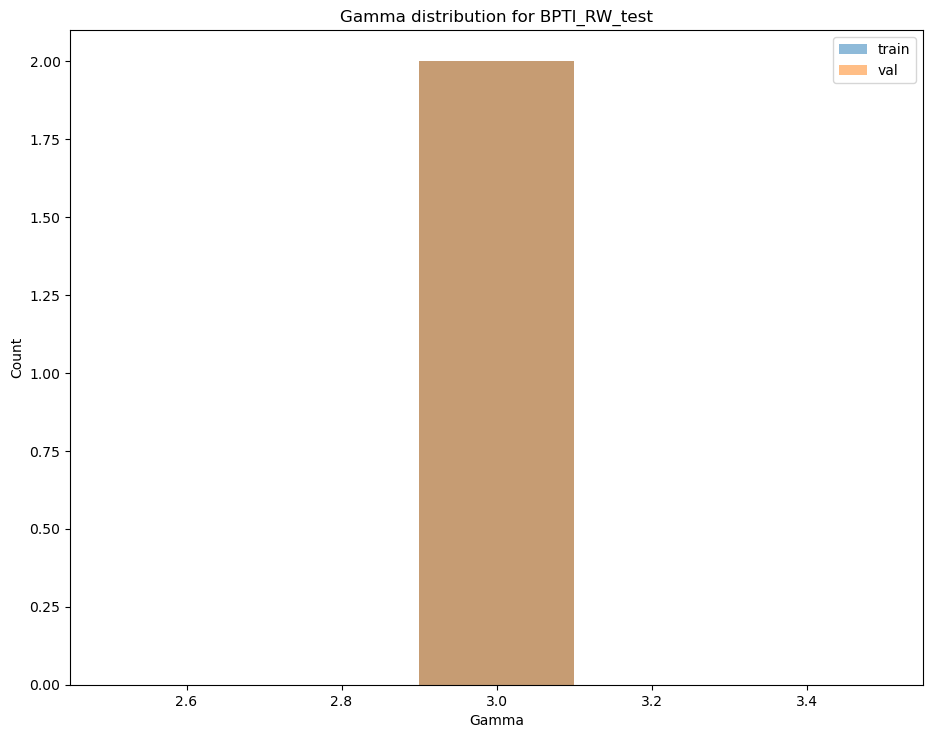

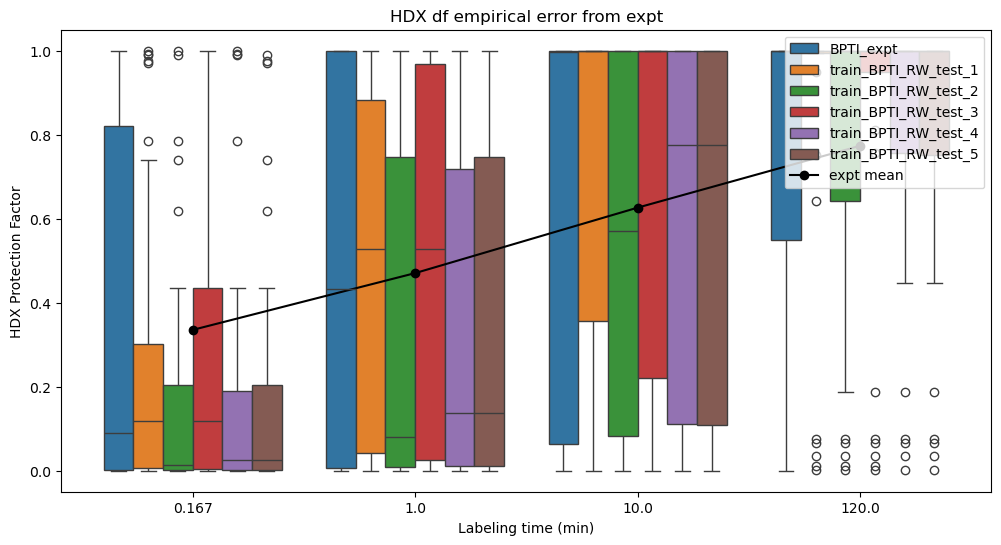

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0           BPTI_expt
1    0.09039  0.43293  0.99656  1.00000        1           BPTI_expt
2    0.02665  0.14933  0.80157  1.00000        2           BPTI_expt
3    0.18680  0.71010  1.00000  1.00000        3           BPTI_expt
4    0.99880  1.00000  1.00000  1.00000        4           BPTI_expt
..       ...      ...      ...      ...      ...                 ...
241  0.99138  1.00000  1.00000  1.00000        3  val_BPTI_RW_test_5
242  0.00196  0.01167  0.11076  0.75553        4  val_BPTI_RW_test_5
243  0.06230  0.31969  0.97876  1.00000        5  val_BPTI_RW_test_5
244  0.14661  0.61301  0.99992  1.00000        6  val_BPTI_RW_test_5
245  1.00000  1.00000  1.00000  1.00000        7  val_BPTI_RW_test_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide  calc_name
0   0.15669  0.63957  0.99996  1.00000        0  BPTI_expt
1   0.0903

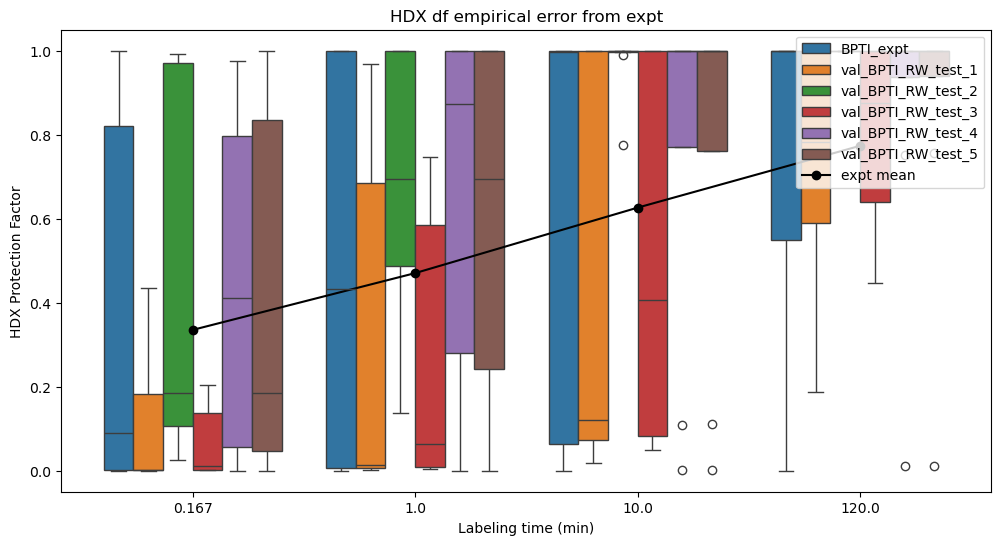

train_rep_names ['train_BPTI_RW_test_1', 'train_BPTI_RW_test_2', 'train_BPTI_RW_test_3', 'train_BPTI_RW_test_4', 'train_BPTI_RW_test_5']
val_rep_names ['val_BPTI_RW_test_1', 'val_BPTI_RW_test_2', 'val_BPTI_RW_test_3', 'val_BPTI_RW_test_4', 'val_BPTI_RW_test_5']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0, 27, 5, 11, 1, 30, 21, 2, 31, 37, 3, 36, 23, 33]
val_rep_peptides [7, 10, 14, 18, 20, 22, 28, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40, 33, 32, 28, 34, 15, 1, 25, 11, 35, 18, 3, 39, 23]
val_rep_peptides [0, 2, 4, 16, 17, 21, 27, 30]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24, 30, 14, 1, 37, 4, 21, 13, 6, 29, 31, 7, 39, 25]
val_rep_peptides [3, 20, 22, 23, 32, 35, 38, 40]


IndexError: list index out of range

In [13]:
with open('test_dump.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )